# Rapport du TP2

Importation des dépendances liées aux TP:

In [10]:
from sklearn import datasets, model_selection
from sklearn.metrics import precision_score
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from time import time

- Charger le jeu de données MNIST

In [3]:
mnist = datasets.fetch_mldata('MNIST original')

- Diviser la base de données en 49000 lignes pour l’apprentissage (training) et le reste pour les tests

In [4]:
index = np.random.randint(70000, size=49000)
data = mnist.data[index]
target = mnist.target[index]

- Construire un modèle de classification ayant comme paramètre: `hidden_layer_sizes = (50)`, puis calculez la précession du classifieur 

In [5]:
# Construire modèle
MLP_model = MLPClassifier(hidden_layer_sizes=(50))

# Choisir données d'apprentissage et du test
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, target, train_size=0.8, test_size=0.2)

# Apprendre et mesurer précesion
MLP_model.fit(x_train, y_train)
y_predict = MLP_model.predict(x_test)

# Afficher score
print("Préscession = ", MLP_model.score(x_test, y_test))

Préscession =  0.9592857142857143


- Afficher la classe de l’image 4 et sa classe prédite

Valeur prédite :  [5.]
L'image: 


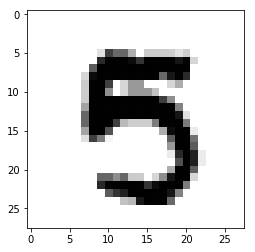

In [6]:
print("Valeur prédite : ", MLP_model.predict(x_test[4].reshape(1,-1)))
print("===========================================")
print("L'image: ")
plt.imshow(x_test.reshape((-1, 28, 28))[4],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

- Calculez la précession en utilisant le package : `metrics.precision_score(ytest_pr, ypredTest_pr,average='micro')`

In [7]:
precision = precision_score(y_test, y_predict, average='micro')

# Afficher score
print("Precision = ", precision)

Precision =  0.9592857142857143


- Varier le nombre de la couches de 1 entre (2 et 100) couches, et recalculer la précision du classifieur. 

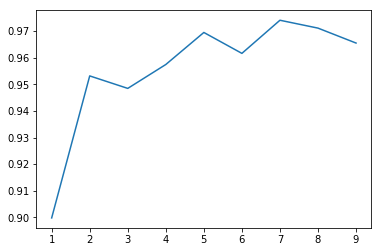

In [8]:
max_l = 10
min_l = 1
precisions = np.zeros(max_l - min_l)
hidden_layer = (50,)* (max_l-min_l)

for n_layer in range (max_l - min_l):
    
    # split donnée
    x_train, x_test, y_train, y_test = model_selection.train_test_split(data, target, train_size=0.8, test_size=0.2)
    
    # Init modèle
    hidden_layer += (50,)
    MLP_model = MLPClassifier(hidden_layer_sizes = hidden_layer[0:n_layer])
    MLP_model.fit(x_train, y_train)
    y_predict = MLP_model.predict(x_test)
    
    precisions[n_layer] = precision_score(y_test, y_predict, average='micro')
        
plt.plot(range(min_l,max_l), precisions)
plt.show()

- Construire cinq modèles de classification des données mnist, avec des réseaux qui ont respectivement de 1 à 10 couches cachées, et des tailles de 
couches entre 10 et 300 au choix d’une façon aléatoire. Quelles sont les performances en taux de bonne classification et en temps d’apprentissage 
obtenus pour chaque modèle ? Utilisez la fonction `time()` du package time pour mesurer le temps d’apprentissage d’un modèle.   

In [ ]:
# nb_hidden_layer == nombre de couche pour le modèle courant
temps_exec = np.zeros(5)
precisions = np.zeros(5)
for model in range(5):
    
    nb_hidden_layer = model * 2
    t_before = time()
    
    # Générer la taille de couche aléatoirement
    hidden_layer = np.random.randint(10, 300, size = nb_hidden_layer) 
    
    # Transformer en tuple
    hidden_layer = tuple(hidden_layer.reshape(1, -1)[0])          

    # Apprentissage
    MLP_model = MLPClassifier(hidden_layer_sizes = hidden_layer)
    MLP_model.fit(x_train, y_train)
    
    # Calcul le temps d'exec
    t_after = time()
    temps_exec[model] = t_after - t_before
        
    # Calcul précision
    y_predict = MLP_model.predict(x_test)
    precisions[model] = precision_score(y_test, y_predict, average='micro')
    

plt.plot(range(5), precisions, 'r', range(5), temps_exec, 'b')
plt.show()   